<a href="https://colab.research.google.com/github/Manisha1208/NNDL/blob/main/Assignment_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
import math

In [4]:
load_data = pd.read_csv("/content/Assignment_14.csv")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [5]:
type(load_data)

pandas.core.frame.DataFrame

In [6]:
data = load_data.rename(columns={5551.82208:'load'},inplace=False)

In [7]:
data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [8]:
data.shape

(2183, 1)

In [9]:
data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


In [11]:
data.corr()

,5551.82208
5551.82208,1.0


VALIDATING NULL VALUE

In [12]:
data.isnull().sum()

5551.82208    0
dtype: int64

VISUALISING OUTLINERS OF DATA

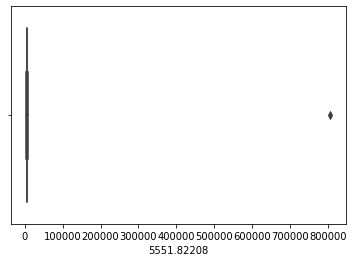

In [14]:
sns.boxplot(x=data['5551.82208'])

In [15]:

from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928]),)


From boxplot and from above zscore calculation, we can conclude that there is one outliner. lets replace it.

In [18]:
data.iloc[928,0] = data.iloc[927,0]


AFTER REPLACING THE OUTLINER

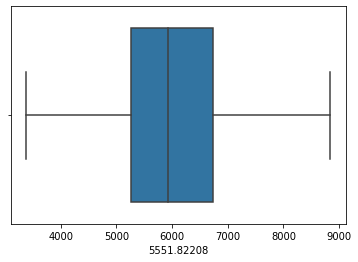

In [19]:
sns.boxplot(x=data['5551.82208'])

now all outliners are removed and now we are good to train the model

In [21]:
data_x = []
data_y = []
for i in range(0,len(data)-(24*7)):
  data_x.append(data.iloc[i,0])
  data_y.append(data.iloc[i+(24*7),0])

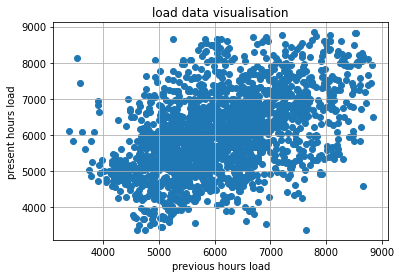

In [22]:
plt.scatter(data_x,data_y)
plt.title("load data visualisation")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()

In [23]:
data_xx = pd.DataFrame(data_x)
min_x = float(data_xx.min())
max_x = float(data_xx.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())
print(min_x)
print(min_y)
print(max_x)
print(max_y)

3381.1930799999996
3377.9196
8841.66948
8841.66948


DATA NORMALISATION

In [24]:
x = minmax_scale(data_x)
y = minmax_scale(data_y)

In [25]:
data_norm = []
for i in range(len(data)-24*7):
  data_norm.append([x[i],y[i]])

data_norm = pd.DataFrame(data_norm)
data_norm

,0,1
0,0.293377,0.322302
1,0.276021,0.286040
2,0.309820,0.254087
3,0.332401,0.300562
4,0.413902,0.404639
...,...,...
2010,0.499943,0.228524
2011,0.536940,0.217797
2012,0.622923,0.246298
2013,0.489837,0.324384


SPLITTING DATA SET

In [26]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(data_norm,test_size=0.1)

In [27]:
data_norm.head()

,0,1
0,0.293377,0.322302
1,0.276021,0.286040
2,0.309820,0.254087
3,0.332401,0.300562
4,0.413902,0.404639


In [28]:
data_x = np.array(data_train[0])

In [29]:
data_y = np.array(data_train[1])

In [30]:
len(data_x)

1813

In [31]:
len(data_test)

202

TRAINING THE MODEL

In [32]:

# initalising required variables
max_iters=2000
m=1.0
c=-1.0
Gm=0.0
Gc=0.0
alpha=0.1
exp=10**(-8)
dm=0.0
dc=0.0
iter=1
error=[]

In [33]:
while (iter<=max_iters):
  err=0.0
  for i in range(len(data_x)):
    gm=-1*(data_y[i]-(m*data_x[i])-c)*data_x[i]
    gc=-1*(data_y[i]-(m*data_x[i])-c)
    err+=(data_y[i]-m*data_x[i]-c)**2
    Gm = Gm + (gm**2)
    Gc = Gc + (gc**2) 
    r1 = math.sqrt(Gm + exp)
    r2 = math.sqrt(Gc + exp)
    dm = -1*(alpha/r1)*gm
    dc = -1*(alpha/r2)*gc
    m = m + dm
    c = c + dc
  error.append(err/(2*len(data_x)))
  iter=iter+1

In [34]:
len(error)

2000

In [35]:
iters = np.arange(max_iters)

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
pred = []
for i in range(len(data_train)):
  pred.append(m*data_x[i] + c)

In [38]:
mse_train = mean_squared_error(data_y,pred)

In [39]:
data_test

,0,1
605,0.596032,0.345211
1901,0.442164,0.271633
729,0.366800,0.395139
592,0.908107,0.845397
989,0.580331,0.268038
...,...,...
1636,0.369940,0.334969
1610,0.572538,0.268466
1451,0.689466,0.708653
1120,0.245846,0.436307


In [40]:
pred_test = m*data_test[0] + c
mse_test = mean_squared_error(data_test[1],pred_test)

In [41]:
print("training data mean squared error:",mse_train)
print("Testing data mean squared error:",mse_test)

training data mean squared error: 0.030404471451849085
Testing data mean squared error: 0.02649627289110288


In [42]:
print("model parameter:",m,c)

model parameter: 0.5005358445130642 0.2327485892617521


VISUALISING TRAINING DATA

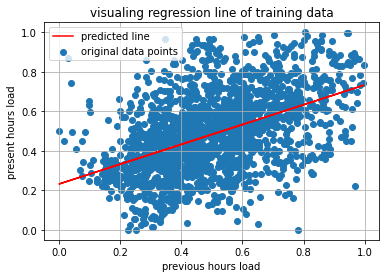

In [43]:

plt.scatter(data_train[0],data_train[1],label="original data points")
plt.plot(data_train[0],pred,color='red',label="predicted line")
plt.title("visualing regression line of training data")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()
plt.legend()
plt.show()

VISUALISING TESTING DATA

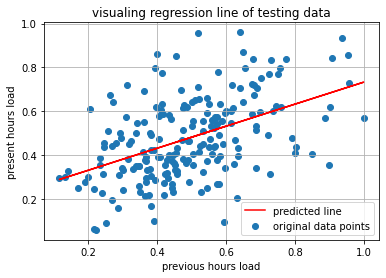

In [44]:
plt.scatter(data_test[0],data_test[1],label="original data points")
plt.plot(data_test[0],pred_test,color='red',label="predicted line")
plt.title("visualing regression line of testing data")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()
plt.legend()
plt.show()

DEPLOYMENT OF MODEL

In [45]:

input_load = float(input("enter load at this time : "))
input_load = (input_load - min_x)/(max_x-min_x)
output_load = input_load*m+c

output_load = output_load*(max_y-min_y)+min_y

print("predicted load for this hour at next week is : ",output_load)

enter load at this time : 4983.1
predicted load for this hour at next week is :  5451.892184775188
